# Introduction

This chapter discusses how _functional plasticity_, the mechanism of changing the strength of the coonnections between neurons, might be modeled.  

### Imports

In [1]:
using Plots
using Distributions

# Hebbian Learning

When modelling the functional plasticity of neural networks in the brain, the strenght of a synaptic connection is typically modeled with a positive real weight value $w$. While the change of this weight continuos in nature, most experiments can only explore modification after a discrete amount of time, so it's common to model varitions the weight of the connection between neuron $i$ and neuron $j$ as

$$
w_{ij}(t + \Delta t) = w_{ij}(t) + \Delta w_{ij}(t^f_i, t^f_j, \Delta t, w_{ij})
$$

Most of the weight change is atributed to the difference between the firing times $t^f$, called _spike timing dependent plasticity_, while  _weight dependent plasticity_ mechanisms serve as thresholds the value of weight. Differences in learning mechanisms can then be explored by changing the $\Delta w_{ij}$ function.

In [2]:
#TODO: single neuron simulations (no code for them in the book)

### Population Models

When discussing hebbian learning on population models, we cannot incorporate spike timing since such concept doesn't exist when considering populations of neurons. Most models then rely on the correlation between the activity of pre-synaptic nodes and post-synaptic nodes.

Most plasticity rules tend to take a form the depends on the firing rates of the population nodes. A common formulation is based on the _covariance rule_ 

$$
\Delta w_{ij} = \epsilon(r_i - \langle r_i \rangle)(r_j - \langle r_j\rangle)
$$

where $\epsilon$ is a normalization constant and $\langle r_i \rangle$ is the average firing rate of the node $i$ over many trials 

In [3]:
function covariance_learning(presynaptic_rates, postsynaptic_rates, average_rate)
    weights = (postsynaptic_rates .- avg_rate) * transpose(presynaptic_rates .- avg_rate)
    weights = weights / sqrt(avg_rate)
end

num_timesteps = 500; num_neurons = 10000; avg_rate = 40;

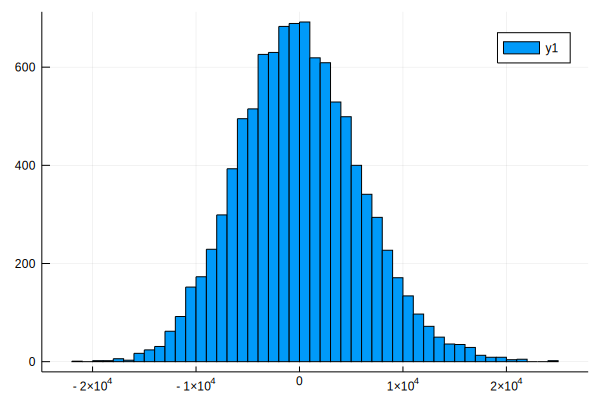

In [4]:
distribution = Exponential(avg_rate)
presynaptic_rates = rand(distribution, num_neurons, num_timesteps)
postsynaptic_rates = rand(distribution, 1, num_timesteps)

weights = covariance_learning(presynaptic_rates, postsynaptic_rates, avg_rate)

histogram(weights[1, :])

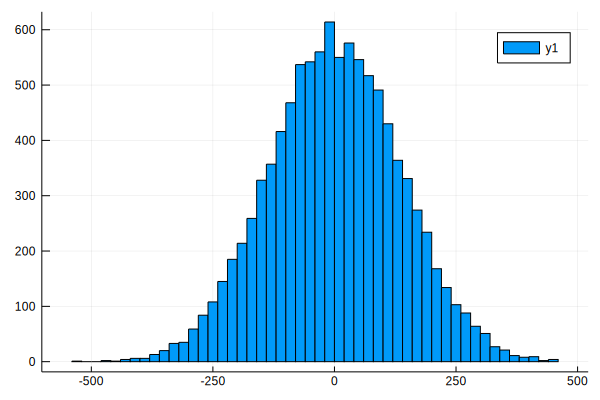

In [5]:
distribution = Poisson(avg_rate)
presynaptic_rates = rand(distribution, num_neurons, num_timesteps)
postsynaptic_rates = rand(distribution, 1, num_timesteps)

weights = covariance_learning(presynaptic_rates, postsynaptic_rates, avg_rate)

histogram(weights[1, :])

### Competitive synaptic scaling and Oja's Rule 

The above example shows that hebbian learning rules lead to a normal distribution of weights and therefore limit the emergence of runaway synapses.
However other mechanisms are important neurons to build functioning neuronal systems. For example, there seems to be some normalization phenomena that scales the strength in neurons that fire with high frequency.
While the mechanism of such normalization is not well understood, mathematically they tend to be modelled as some form of normalization of the weigth vector

One common form of such normalization is Oja's Rule, that models the plasticity rule as

$$
\Delta w_{ij} = r_i r_j - (r_i)^2w_{ij}
$$

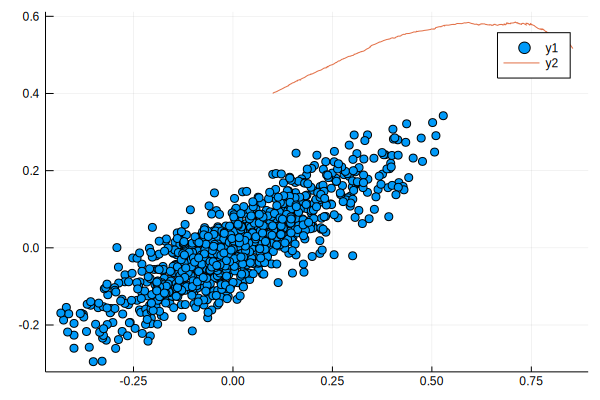

In [35]:
distribution = Normal()
a = -pi/6; rotation_matrix = [cos(a) sin(a) ; -sin(a) cos(a)]
weights = [0.1; 0.4]

all_x = []; all_y = [];
w_traj = [];
for i in 1:1000
    presynaptic_rates = 0.05 * rotation_matrix * (rand(distribution, 2, 1) .* [4 ; 1])
    append!(all_x, presynaptic_rates[1])
    append!(all_y, presynaptic_rates[2])
    
    postsynaptic_rate = weights' * presynaptic_rates
    delta_w = postsynaptic_rate .* (presynaptic_rates - postsynaptic_rate .* weights)
    weights = weights + 0.1 * delta_w
    push!(w_traj, weights)
end
scatter(all_x, all_y)
plot!([p[1] for p in w_traj], [p[2] for p in w_traj])
